<center>
<img src="https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/img/this_is_data_anal.png" width="200" height="200"><br>
</center>

## 1.3 국가별 음주 데이터 분석하기


두 번째 예제에서는 국가별 음주 데이터를 활용하여 탐색적 데이터 분석을 진행하자.



### step.1 탐색: 데이터의 기초 정보 살펴보기


이번 데이터셋을 이루고 있는 피처는 다음과 같다.


- country : 국가정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_litres_of_pure_alchol : 총 알코올 소비량
- continent : 국가의 대륙 정보

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/home/jaeyoon89/python-data-analysis/data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


나머지 피처의 수치적 정보를 살펴보기 위해 describe() 함수를 실행해 보면 결과는 아래와 같다.


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### step.2 인사이트의 발견: 탐색과 시각화 하기


다음으로 피처간의 상관 관계를 살펴보자. 피처 간의 상관 관계를 통계적으로 탐색하는 방법은 크게 두 가지이다. 첫 번째 방법은 피처가 2개일 때의 상관 계수를 계산하는 단순 상관 분석 방법이며,  두 번째 방법은 대상 피처가 여러 개일 때 상호간의 연관성을 분석하는 다중 상관 분석이다. 상관 관계를 살펴볼 대상은 beer_servings, wine_servings, spirit_servings, total_litres_of_pure_alchol 이렇게 4개의 피처이다.
먼저 맥주와 와인 소비량의 상관 관계를 알아보자. 아래 코드처럼 데이터 프레임에서 두 피처를 선택한 뒤, corr()함수를 적용한다.

- 두 피처 간의 상관 계수 구하기

In [4]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


이제 모든 피처들을 각각 1대 1로 비교하여 살펴보자. 아래 실행 결과는 4개 피처에 corr()함수를 적용한 상관 계수 행렬을 출력한 것이다.

- 여러 피처의 상관 관계 분석하기

In [5]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


이를 좀 더 쉽게 실행하기 위해 'heatmap', 'pairplot' 이라는 기법을 사용해 보자. 파이썬의 seaborn이라는 시각화 라이브러리를 활용하여 이 2개 기법을 사용할 수 있다. 코드는 매우 간단하다. heatmap의 경우 corr.values를, pairplot의 경우 데이터 프레임을 파라미터로 넣어준다.

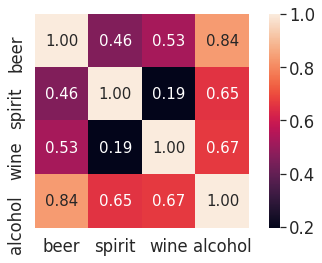

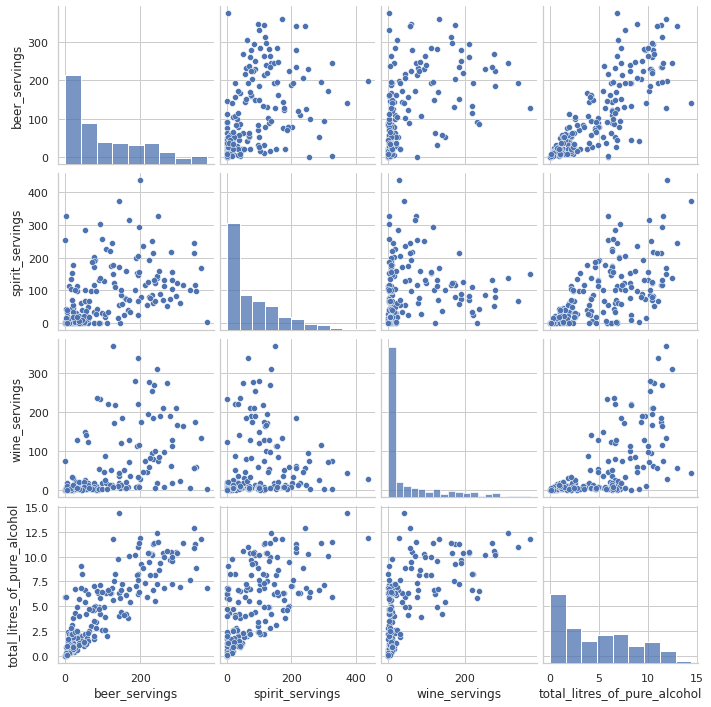

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

sns.set(style = 'whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

위 두 그래프를 보면 total_litres_of_pure_alcohol 피처가 대체적으로 모든 피처와 상관 관계가 있는 것으로 보이며, 특히 beer_servings와 상관성이 높다. 첫 번째 그래프가 heatmap그래프, 두 번째 그래프가 pairplot 그래프이다.

### step.3 탐색적 분석: 스무고개로 개념적 탐색 분석하기


본격적인 탐색적 분석에 들어가기에 앞서 continent 피처에 존재하는 결측 데이터를 처리하자. 대륙에 대한 정보가 없는 국가를 'OT'라는 대륙으로 새롭게 정의하자. fillna() 함수를 사용하여 drinks 데이터 프레임의 continent 피처의 결측값을 OT로 채워준다.

In [7]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


이번에는 전체 대륙중에서 OT가 차지하는 비율이 얼마나 되는지를 파이차트로 확인해보자. 아래 코드는 plt.pie() 함수를 이용한 파이차트 출력 방법이다.

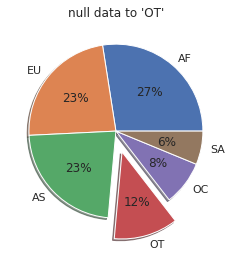

In [8]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

### - 대륙별 spirit_servings의 통계적 정보는 어느 정도일까?


다음 코드는 agg() 함수를 사용하여 대륙 단위로 분석을 수행한다. agg() 함수는 apply() 함수와 거의 동일한 기능을 하지만, apply()에 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수이다.

In [9]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### - 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?


전체 평균보다 많은 알코올을 섭취하는 대륙을 탐색할 때는 apply()나 agg() 함수 없이도 mean()함수만을 이용한 탐색을 수행할 수 있다.

In [10]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


### - 평균 beer_servings가 가장 높은 대륙은 어디일까?


그리고 mean() 함수만을 이용한 탐색에 idxmax() 함수를 적용하면 평균 'beer_servings'가 가장 높은 대륙이 어디인지 찾을 수 있다. idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환하는 기능을 수행한다.

In [11]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


### - 시각화


아래 코드는 이 결과를 그래프로 시각화한 것이다.

- 분석 결과를 시각화하기

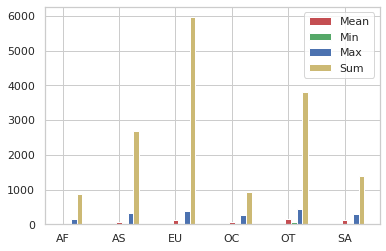

In [12]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화한다.
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

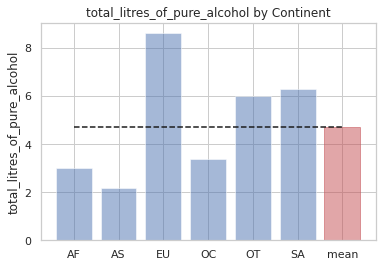

In [13]:
# 대룩별 total_litres_of_pure_alcohol을 시각화 한다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

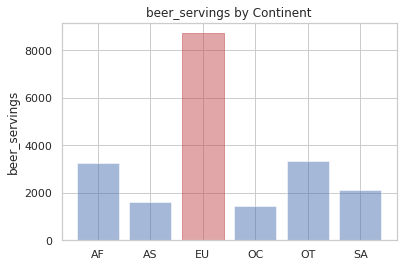

In [14]:
# 대륙별 beer_servings를 시각화 한다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

### step.4 통계적 분석: 분석 대상 간의 통계적 차이 검정하기


지금까지는 두 피처간의 상관성을 계산하거나 혹은 그룹 단위로 나누어 수치 정보를 살펴보는 방식의 데이터 분석을 알아 보았다. 이러한 분석은 데이터에서 인사이트를 발견하는 데 있어서 매우 유용한 방법이다. 하지만 이는 분석가의 주관에 따라 도출된 내용이기 때문에 분석 자체의 타당성을 증명하기에는 한계가 있다. 따라서 분석 결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요하다. 그 중 가장 기본적인 방법인 t-test를 통해 분석 대상 간에 통계적 차이를 검정하는 방법을 알아보자.

파이썬에서는 scipy라는 라이브러리를 활용하여 두 집단 간의 t-test를 검정할 수 있다. 아래 코드는 t-test를 적용하는 아주 간단한 예제이다. 
ttest_ind() 함수에 두 집단의 시리즈 데이터를 넣는 것으로 검정의 결과를 확인할 수 있는데, 이 함수의 파라미터인 equal_var는 t-test의 두 가지 방법중에 하나를 선택하는 것이다. 첫 번째는 두 집단의 분산이 같은 경우, 그리고 두 번째는 두 집단의 분산이 같지 않은 경우를 가정한 것이다. 

- 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

In [15]:
# 아프리카와 유럽 간의 맥주 소비량 차이를 검정한다.
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                    europe['beer_servings'], equal_var = False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)


The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value assuming equal variances is -7.144 and 0.000.


실행 결과에 등장하는 t-statistic은 t-test의 검정 통계량을 의미하는 것으로, 함께 출력되는 p-value와 연관 지어 해석해야 한다. p-value는 가설이 얼마나 믿을만한 것인지를 나타내는 지표로, 데이터를 새로 샘플링 했을 때 귀무 가설이 맞다는 전제하에 현재 나온 통계값 이상이 나올 확률 이라고 정의할 수 있다. 만약 p-value가 너무 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 된다. 보통 그 기준은 0.05나 0.01을 기준으로 하며, 이를 p-value라고 한다.

이번엔 '대한민국은 얼마나 독하게 술을 마시는 나라일까'에 대한 탐색 코드를 살펴볼 차례이다. 이를 판단하는 기준으로, alcohol_rate 피처를 생성한다. 이 피처는 total_litres_of_pure_alcohol 피처를 모든 술의 총 소비량으로 나눈 것이다. 그리고 alcohol_rate는 sort_values() 함수를 사용하여 국가를 기준으로 정렬한다.

- '대한민국은 얼마나 술을 독하게 마시는 나라일까?' 에 대한 탐색 코드 살펴보기

In [16]:
# total_servings 피처를 생성한다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처를 생성한다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성한다.
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


- 국가별 순위 정보를 시각화 하기

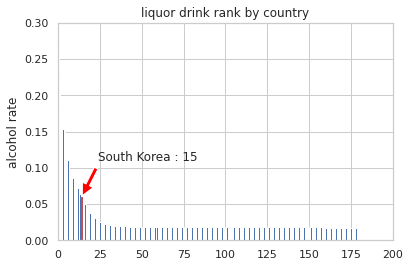

In [18]:
# 국가별 순위 정보를 그래프로 시각화 한다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank +1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops=dict(facecolor='red', shrink = 0.05))
plt.show()